In [1]:
# Import dependencies
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read into excel file
xls = pd.ExcelFile("./Resources/KPMG_VI_New_raw_data_update_final.xlsx")
transactions_xls = pd.read_excel(xls, "Transactions", header=1)
new_customer_list_xls = pd.read_excel(xls, "NewCustomerList", header=1)
customer_demographic_xls = pd.read_excel(xls, "CustomerDemographic", header=1)
customer_address_xls = pd.read_excel(xls, "CustomerAddress", header=1)

## Data Cleaning

In [3]:
# Create function to drop all customer_ids above 3500
def consistent_id(excel_sheet):
    excel_sheet = excel_sheet.loc[excel_sheet["customer_id"] <= 3500]
    return excel_sheet

In [4]:
# Apply range of below 3500 to all sheets
cleaned_transactions_xls = consistent_id(transactions_xls)
cleaned_customer_demographic_xls = consistent_id(customer_demographic_xls)
cleaned_customer_address_xls = consistent_id(customer_address_xls)

### Transactions

In [5]:
cleaned_transactions_xls.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
# Convert online order column to boolean
cleaned_transactions_xls["online_order"] = cleaned_transactions_xls["online_order"].astype(bool)

In [7]:
# Drop all null values for transactions
cleaned_transactions_xls = cleaned_transactions_xls.dropna()

In [8]:
# Display cleaned dataframe
cleaned_transactions_xls.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


### Customer Demographics

In [9]:
# Drop null values only for DOB and job title columns of customer demographics
cleaned_customer_demographic_xls = cleaned_customer_demographic_xls.dropna(subset=["DOB", "job_title"])

In [10]:
# Drop default column of meta data
cleaned_customer_demographic_xls = cleaned_customer_demographic_xls.drop(columns="default")

In [11]:
# Check remaining null values
# Remain nulls for last_name and job_industry_category as they do not affect future analysis
cleaned_customer_demographic_xls.count()

customer_id                            3004
first_name                             3004
last_name                              2908
gender                                 3004
past_3_years_bike_related_purchases    3004
DOB                                    3004
job_title                              3004
job_industry_category                  2531
wealth_segment                         3004
deceased_indicator                     3004
owns_car                               3004
tenure                                 3004
dtype: int64

In [12]:
# Find outlier of DOB column
cleaned_customer_demographic_xls["DOB"].min()

Timestamp('1843-12-21 00:00:00')

In [13]:
# Drop outlier
cleaned_customer_demographic_xls = cleaned_customer_demographic_xls[cleaned_customer_demographic_xls.DOB != "1843-12-21 00:00:00"]

In [14]:
# Add age column
now = pd.Timestamp("now")
cleaned_customer_demographic_xls["age"] = (now - cleaned_customer_demographic_xls["DOB"]).astype("<m8[Y]")

In [15]:
# Create age bins for analysis later
cleaned_customer_demographic_xls["age_bins"] = pd.cut(x=cleaned_customer_demographic_xls['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89])

In [16]:
cleaned_customer_demographic_xls["age_bins"].unique()

[(59, 69], (29, 39], (39, 49], (49, 59], (19, 29], (10, 19], (69, 79], (79, 89]]
Categories (8, interval[int64]): [(10, 19] < (19, 29] < (29, 39] < (39, 49] < (49, 59] < (59, 69] < (69, 79] < (79, 89]]

In [17]:
cleaned_customer_demographic_xls["age_by_decade"] = pd.cut(x=cleaned_customer_demographic_xls['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89], labels=["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s"])

In [18]:
# Check for gender unique values
cleaned_customer_demographic_xls["gender"].value_counts()

Female    1532
Male      1468
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [19]:
# Replace inconsistent values in gender column
cleaned_customer_demographic_xls["gender"] = cleaned_customer_demographic_xls["gender"].replace(["Femal", "F", "M"], ["Female", "Female", "Male"])

In [20]:
# List all available columns
cd_cols = list(cleaned_customer_demographic_xls.columns.values)
cd_cols

['customer_id',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'age',
 'age_bins',
 'age_by_decade']

In [21]:
# Rearrange columns
cleaned_customer_demographic_xls = cleaned_customer_demographic_xls
[['customer_id',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'age',
 'age_bins',
 'age_by_decade',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure']]

[['customer_id',
  'first_name',
  'last_name',
  'gender',
  'past_3_years_bike_related_purchases',
  'DOB',
  'age',
  'age_bins',
  'age_by_decade',
  'job_title',
  'job_industry_category',
  'wealth_segment',
  'deceased_indicator',
  'owns_car',
  'tenure']]

In [22]:
# Display cleaned dataframe
cleaned_customer_demographic_xls.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_bins,age_by_decade
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.0,"(59, 69]",60s
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0,"(29, 39]",30s
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0,"(59, 69]",60s
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43.0,"(39, 49]",40s
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,58.0,"(49, 59]",50s


### Customer Address

In [23]:
# Check for null values
cleaned_customer_address_xls.count()

customer_id           3496
address               3496
postcode              3496
state                 3496
country               3496
property_valuation    3496
dtype: int64

In [24]:
# Check for values that need to be replaced
cleaned_customer_address_xls["state"].value_counts()

NSW                1783
VIC                 801
QLD                 744
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [25]:
# Replace inconsistent values in state column
cleaned_customer_address_xls["state"] = cleaned_customer_address_xls["state"].replace(["New South Wales", "Victoria"], ["NSW", "VIC"])

In [26]:
# Check if values were successfully replaced
cleaned_customer_address_xls["state"].value_counts()

NSW    1869
VIC     883
QLD     744
Name: state, dtype: int64

In [27]:
# Display cleaned dataframe
cleaned_customer_address_xls.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


### New customer list

In [28]:
# Add age column to new customers list
new_customer_list_xls["age"] = (now - new_customer_list_xls["DOB"]).astype("<m8[Y]")

In [29]:
# Create age bins for analysis later
new_customer_list_xls["age_bins"] = pd.cut(x=new_customer_list_xls['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89])

In [30]:
# Create age bins labels
new_customer_list_xls["age_by_decade"] = pd.cut(x=new_customer_list_xls['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89], labels=["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s"])

In [31]:
# List all available columns in dataframe
cl_cols = list(new_customer_list_xls.columns.values)
cl_cols

['first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Rank',
 'Value',
 'age',
 'age_bins',
 'age_by_decade']

In [32]:
# Rearrange columns
new_customer_list_xls = new_customer_list_xls[['first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'age',
 'age_bins',
 'age_by_decade',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Rank',
 'Value']]

In [33]:
# Display final dataframe
new_customer_list_xls.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_bins,age_by_decade,job_title,job_industry_category,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,63.0,"(59, 69]",60s,General Manager,Manufacturing,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,50.0,"(49, 59]",50s,Structural Engineer,Property,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,46.0,"(39, 49]",40s,Senior Cost Accountant,Financial Services,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,41.0,"(39, 49]",40s,Account Representative III,Manufacturing,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,55.0,"(49, 59]",50s,Financial Analyst,Financial Services,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


## Exploratory Data Analysis

In [34]:
# Merge customer demographics and transactions dataframes
merged_transactions_demographics = pd.merge(cleaned_customer_demographic_xls, cleaned_transactions_xls, on="customer_id", how="inner")
merged_transactions_demographics

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17023,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2017-03-07,False,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,37659.0
17024,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2017-04-02,True,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,40303.0
17025,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,2017-11-08,True,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,42688.0
17026,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,2017-09-01,True,Approved,Solex,Standard,medium,medium,575.27,431.45,35160.0


In [35]:
merged_transactions_demographics.count()

customer_id                            17028
first_name                             17028
last_name                              16490
gender                                 17028
past_3_years_bike_related_purchases    17028
DOB                                    17028
job_title                              17028
job_industry_category                  14315
wealth_segment                         17028
deceased_indicator                     17028
owns_car                               17028
tenure                                 17028
age                                    17028
age_bins                               17028
age_by_decade                          17028
transaction_id                         17028
product_id                             17028
transaction_date                       17028
online_order                           17028
order_status                           17028
brand                                  17028
product_line                           17028
product_cl

In [36]:
# Merge customer address and transactions dataframes
merged_transactions_address = pd.merge(cleaned_customer_address_xls, merged_transactions_demographics, on="customer_id", how="inner")
merged_transactions_address

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,2017-04-06,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,2017-02-21,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17010,3496,2565 Caliangt Point,2171,NSW,Australia,9,Danya,Burnyeat,Male,99,...,2017-03-07,False,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,37659.0
17011,3496,2565 Caliangt Point,2171,NSW,Australia,9,Danya,Burnyeat,Male,99,...,2017-04-02,True,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,40303.0
17012,3497,96 Delladonna Trail,3976,VIC,Australia,5,Thia,O'Day,Female,73,...,2017-11-08,True,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,42688.0
17013,3497,96 Delladonna Trail,3976,VIC,Australia,5,Thia,O'Day,Female,73,...,2017-09-01,True,Approved,Solex,Standard,medium,medium,575.27,431.45,35160.0


In [37]:
merged_transactions_address.count()

customer_id                            17015
address                                17015
postcode                               17015
state                                  17015
country                                17015
property_valuation                     17015
first_name                             17015
last_name                              16477
gender                                 17015
past_3_years_bike_related_purchases    17015
DOB                                    17015
job_title                              17015
job_industry_category                  14302
wealth_segment                         17015
deceased_indicator                     17015
owns_car                               17015
tenure                                 17015
age                                    17015
age_bins                               17015
age_by_decade                          17015
transaction_id                         17015
product_id                             17015
transactio

## Customer Segmentation Analysis
### Finding potential relationships between variables - use Seaborn heatmap
### Exploring demographic, geographic, behavioural, psychographic data

age vs past 3 years bike related purchases

gender vs past 3 years bike related purchases

state vs cars owned - bar chart

wealth segment by age  - stacked bar chart

state vs owns cars - grouped bar chart

In [38]:
# Use seaborn styling for charts
plt.style.use("seaborn")

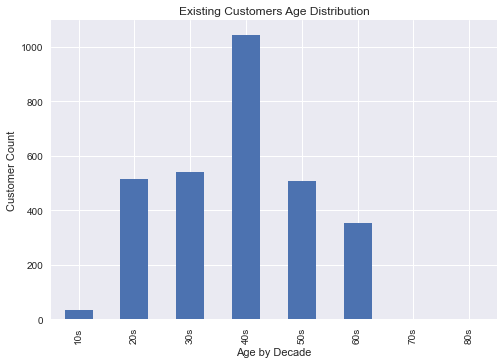

In [39]:
# Existing customers age distribution
grouped_age = merged_transactions_demographics.groupby(["age_by_decade"])
people_count = grouped_age["customer_id"].nunique()
people_count.plot.bar()
plt.style.use("seaborn")
plt.title("Existing Customers Age Distribution")
plt.xlabel("Age by Decade")
plt.ylabel("Customer Count")
plt.savefig("output/existing_customers_age_distribution.png")

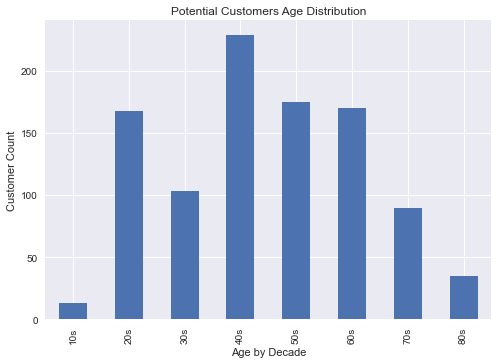

In [40]:
# Potential customers age distribution
grouped_age = new_customer_list_xls.groupby(["age_by_decade"])
people_count = grouped_age["first_name"].count()
people_count.plot.bar()
plt.title("Potential Customers Age Distribution")
plt.xlabel("Age by Decade")
plt.ylabel("Customer Count")
plt.savefig("output/potential_customers_age_distribution.png")

In [ ]:
# Bike related purchases for the past 3 years by gender (existing customers)
grouped_gender = merged_transactions_demographics.groupby("gender")
three_years_transactions_count = grouped_gender["past_3_years_bike_related_purchases"].sum()
three_years_transactions_count.plot.bar(title="Bike related purchases for the past 3 years by gender (by count)")
plt.xlabel("Gender")
plt.ylabel("Purchases Count")

In [ ]:
three_years_transactions_percentage = (three_years_transactions_count/three_years_transactions_count * 100)
three_years_transactions_percentage.plot.bar(title="Bike related purchases for the past 3 years by gender (by percentage)")
plt.xlabel("Gender")
plt.ylabel("Percentage of Purchases")

In [ ]:
# Job Industry Distribution
grouped_job_categories = merged_transactions_address.groupby(["job_industry_category"])
job_category_count = grouped_job_categories["customer_id"].count()
job_category_count.plot.pie(title="Job Industry Distribution (existing customers)", autopct='%1.1f%%', shadow=True)
plt.ylabel("")
plt.axis("equal")

In [ ]:
# Job Industry Distribution
grouped_job_categories = new_customer_list_xls.groupby(["job_industry_category"])
job_category_count = grouped_job_categories["first_name"].count()
job_category_count.plot.pie(title="Job Industry Distribution (potential customers)", autopct='%1.1f%%', shadow=True)
plt.ylabel("")
plt.axis("equal")

In [ ]:
# Wealth segmentation by age category - stacked bar chart (existing customers)
grouped_age = cleaned_customer_demographic_xls.groupby(["age_by_decade"])
wealth_segment = grouped_age["wealth_segment"].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title("Wealth Segmentation by Age Cetegories")
plt.xlabel("Age by Decade")
plt.ylabel("Count")

In [ ]:
# Wealth segmentation by age category - stacked bar chart (potential customers)
grouped_age = new_customer_list_xls.groupby(["age_by_decade"])
wealth_segment = grouped_age["wealth_segment"].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title("Wealth Segmentation by Age Cetegories")
plt.xlabel("Age by Decade")
plt.ylabel("Count")

In [ ]:
# Number of cars owned or not owned by state - grouped bar chart
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
grouped_state = merged_transactions_address.groupby(["state"])
owns_car = grouped_state["owns_car"].value_counts().plot.bar()
plt.title("Number of Cars Owned or Not Owned by State")
plt.xlabel("State")
plt.ylabel("Count")

## Model Development
### Customer Segmentation using RFM analysis
Steps of RFM(Recency, Frequency, Monetary):

1. Calculate the Recency, Frequency, Monetary values for each Customer

2. Add segment bin values to RFM table using quartile

3. Sort the customer RFM score in ascending order

Correlation

In [ ]:
cleaned_transactions_xls.head()

In [ ]:
# Define present date
latest_date = cleaned_transactions_xls["transaction_date"].max()
print(latest_date)

present = dt.datetime(2017,12,30)
present

In [ ]:
# Calculate Recency, Frequency and Monetary
rfm = cleaned_transactions_xls.groupby("customer_id").agg({"transaction_date": lambda date: (present - date.max()).days, 
                                                            "transaction_id": lambda num: len(num),
                                                            "list_price": lambda price: price.sum()})
rfm.columns

In [ ]:
# Change column names
rfm.columns=["recency","frequency","monetary"]
rfm["recency"] = rfm["recency"].astype(int)
rfm.head()

### Computing Quantile of RFM values
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [ ]:
# Using qcut() to bin data based on sample quantiles
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm.head()

### RFM Result Interpretation
Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help to segment the customers well group.

In [ ]:
rfm["RFM_Score"] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

In [ ]:
# Filter out Top/Best customers
rfm[rfm["RFM_Score"]=="111"].sort_values('monetary', ascending=False).head()